In [ ]:
 #Import the required libariries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**STEP I: DATA PREPARATION**

This steps involves getting the necessary data needed for the analysis,understanding, and cleaning it from all forms of possible errors (e.g nulls and wrong data type), removing duplicates, to ensure a quality data for the analysis.

In [ ]:
# Load dataset into pandas dataframe
df = pd.read_csv('/content/Market Basket Analysis - Groceries_dataset (1).csv')
df.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [ ]:
df.tail(10)

,Member_number,Date,itemDescription
38755,4586,26-09-2014,bottled water
38756,1987,29-10-2014,fruit/vegetable juice
38757,4376,07-12-2014,rolls/buns
38758,2511,18-06-2014,long life bakery product
38759,3364,06-05-2014,oil
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [ ]:
df.sample(10)

,Member_number,Date,itemDescription
347,3235,28-12-2015,root vegetables
27967,4094,21-10-2014,fruit/vegetable juice
38319,1979,09-05-2014,bottled water
30905,3866,19-10-2014,bottled beer
7485,2230,28-05-2015,tropical fruit
38539,1521,11-09-2014,margarine
7804,3497,08-09-2015,beef
19284,3885,15-10-2015,rolls/buns
7978,1100,12-03-2015,grapes
14579,3247,24-09-2014,fruit/vegetable juice


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
# To remove excess white space if any is present
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [ ]:
# Convert 'Date' column to a standard date format
df['Date'] = pd.to_datetime(df['Date'])

# Ensure data types are appropriate
df.dtypes

<ipython-input-7-ecf061d7cd83>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
#Percentage of duplicate values
print(f'number of duplicate entries {df.duplicated().sum()}, duplicate entries in percent {round(df.duplicated().sum()/len(df)*100,2)}%\n')

       Member_number       Date   itemDescription
5015            2051 2015-11-09       frankfurter
5022            3055 2015-08-18  other vegetables
5044            1994 2015-11-03        whole milk
5055            1682 2015-06-25         pip fruit
5059            4324 2015-05-01           sausage
...              ...        ...               ...
38614           2027 2014-02-26     domestic eggs
38684           2936 2014-07-03        newspapers
38685           2311 2014-03-13        pot plants
38722           3834 2014-05-18       salty snack
38723           1146 2014-05-23            yogurt

[759 rows x 3 columns]
number of duplicate entries 759, duplicate entries in percent 1.96%



In [ ]:
# Remove duplicates from the original data frame
df = df.drop_duplicates()

In [ ]:
# Check again for duplicates
print(df.duplicated().sum())

0


**EXPLORATORY DATA ANALYSIS(EDA)**

 Exploratory Data Analysis (EDA) is a crucial step in data analysis process to uncover patterns, relationships, and trends within the dataset. EDA involves using statistical and visualization techniques to summarize the main characteristics of the data, identify patterns, and generate hypotheses for further analysis.

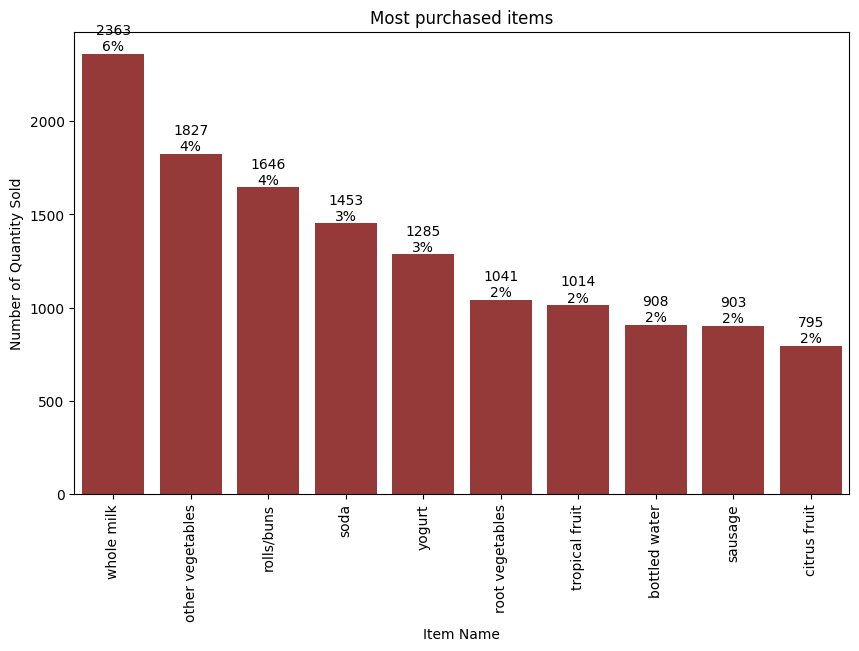

In [ ]:
# Visualize the distribution of  top 10 item in itemDescription

plt.figure(figsize=(10, 6))
plot = sns.countplot(x=df['itemDescription'],
                     order=df['itemDescription'].value_counts(ascending=False).iloc[:10].index,
                     color='brown')

plt.title('Most purchased items')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.xlabel('Item Name')
plt.ylabel('Number of Quantity Sold')

# Add labels to the bars with both count and percentage
total_items = len(df['itemDescription'])
for i, (count, percentage) in enumerate(zip(df['itemDescription'].value_counts(ascending=False).iloc[:10].values,
                                            df['itemDescription'].value_counts(ascending=False).iloc[:10].values / total_items * 100)):
    plt.text(i, count, f'{count}\n{int(percentage)}%', ha='center', va='bottom')

plt.show()

In [ ]:
# Set the date as index
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


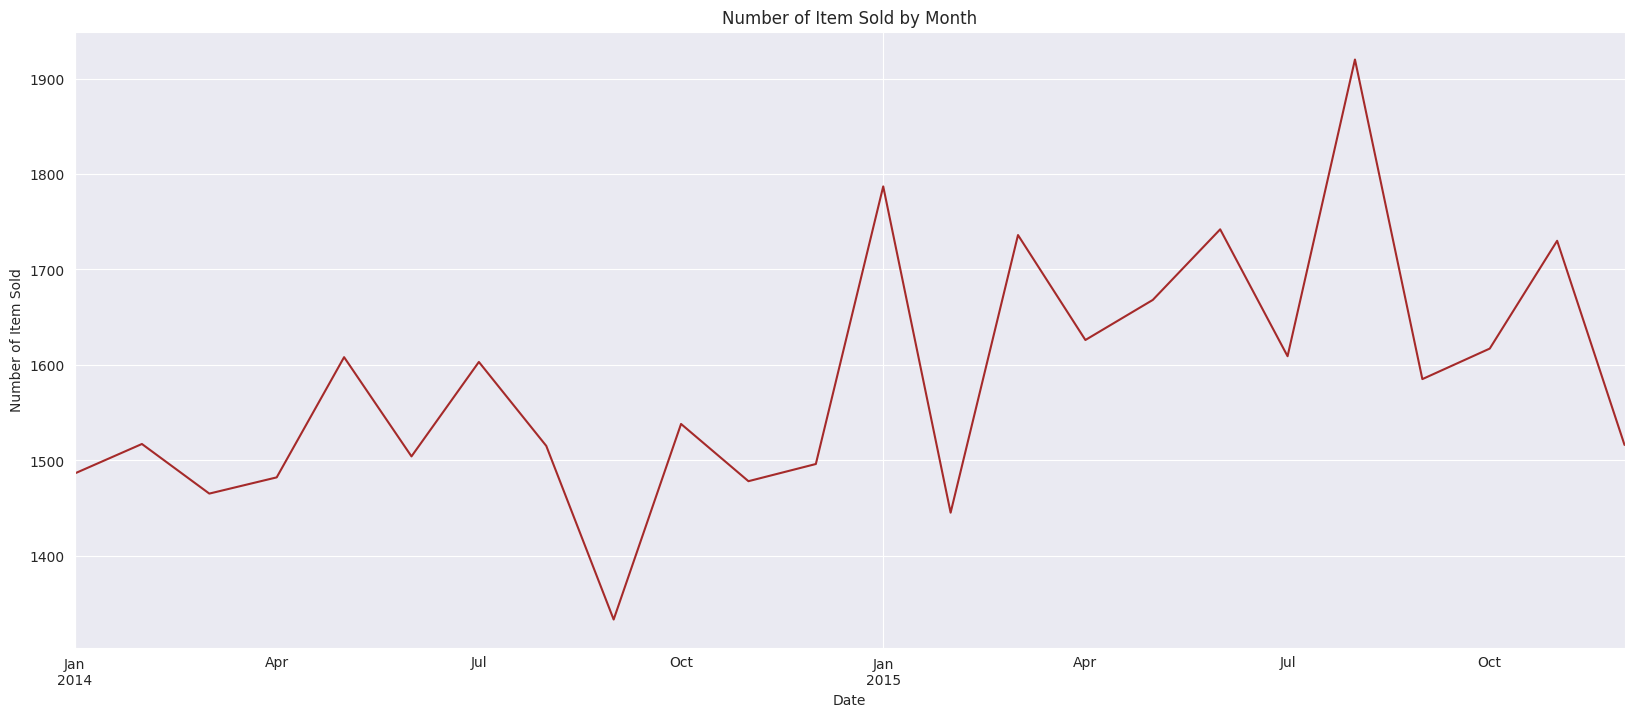

In [ ]:
plt.figure(figsize=(20, 8))
sns.set_style('darkgrid')

# Assuming df_date is a DateTimeIndex
plot = df_date.resample('M')['itemDescription'].count().plot(kind='line',color='brown')

plt.title('Number of Item Sold by Month')
plt.xlabel('Date')
plt.ylabel('Number of Item Sold')

plt.show()


**MARKET BASKET ANALYSIS(MBA)**

 Market Basket Analysis is a method used to find patterns in customer shopping behavior, helping businesses understand which products are often bought together. This knowledge can be leveraged to improve the arrangement of products in stores, create targeted marketing campaigns, and enhance overall business strategies.

It is often applied in retail or e-commerce but can be used in various industries where transactions or interactions involve multiple items.

**EXPLAINATION OF TERMS USED IN MBA**

1. **Baskets of Items:**
   - Imagine you're at a grocery store, and you have a shopping basket. In this context, each purchase you make is like a "basket" of items.

2. **Association Rules:**
   - MBA is interested in finding patterns or associations among items that tend to be bought together. For example, if customers often buy bread and butter together, there might be an association between these two items.

3. **Frequent Itemsets:**
   - MBA identifies sets of items that frequently appear together in transactions. These sets are called "frequent itemsets."

4. **Support, Confidence, and Lift:**
   - MBA uses metrics like support, confidence, and lift to measure the strength and significance of associations between items.
      - **Support:** How frequently a particular itemset appears in the dataset.
      - **Confidence:** The likelihood that if a customer buys one item (antecedent), they will also buy another item (consequent).
      - **Lift:** Measures how much more likely items are bought together than if they were bought independently.

 **Example:**
   - Let's say MBA identifies a rule with high confidence, indicating that customers who buy milk are 80% likely to buy cereal as well. This information could be valuable for store owners because it suggests a strong association between these items. They might decide to place milk and cereal close to each other in the store to encourage additional sales.

 **Business Insights:**
   - The insights gained from MBA can help businesses optimize product placement, marketing strategies, and even make decisions about discounts or promotions to maximize sales and customer satisfaction.



In [ ]:
# Import necessary libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Encode the items in the dataset
basket = (df.groupby(['Member_number', 'Date', 'itemDescription'])
          .size().unstack().reset_index().fillna(0)
          .set_index(['Member_number', 'Date']))
basket

itemDescription           Instant food products  UHT-milk  abrasive cleaner  \
Member_number Date                                                            
1000          2014-06-24                    0.0       0.0               0.0   
              2015-03-15                    0.0       0.0               0.0   
              2015-05-27                    0.0       0.0               0.0   
              2015-07-24                    0.0       0.0               0.0   
              2015-11-25                    0.0       0.0               0.0   
...                                         ...       ...               ...   
4999          2015-05-16                    0.0       0.0               0.0   
              2015-12-26                    0.0       0.0               0.0   
5000          2014-09-03                    0.0       0.0               0.0   
              2014-11-16                    0.0       0.0               0.0   
              2015-10-02                    0.0       0.0               0.0   

itemDescription           artif. sweetener  baby cosmetics  bags  \
Member_number Date                                                 
1000          2014-06-24               0.0             0.0   0.0   
              2015-03-15               0.0             0.0   0.0   
              2015-05-27               0.0             0.0   0.0   
              2015-07-24               0.0             0.0   0.0   
              2015-11-25               0.0             0.0   0.0   
...                                    ...             ...   ...   
4999          2015-05-16               0.0             0.0   0.0   
              2015-12-26               0.0             0.0   0.0   
5000          2014-09-03               0.0             0.0   0.0   
              2014-11-16               0.0             0.0   0.0   
              2015-10-02               0.0             0.0   0.0   

itemDescription           baking powder  bathroom cleaner  beef  berries  ...  \
Member_number Date                                                        ...   
1000          2014-06-24            0.0               0.0   0.0      0.0  ...   
              2015-03-15            0.0               0.0   0.0      0.0  ...   
              2015-05-27            0.0               0.0   0.0      0.0  ...   
              2015-07-24            0.0               0.0   0.0      0.0  ...   
              2015-11-25            0.0               0.0   0.0      0.0  ...   
...                                 ...               ...   ...      ...  ...   
4999          2015-05-16            0.0               0.0   0.0      0.0  ...   
              2015-12-26            0.0               0.0   0.0      0.0  ...   
5000          2014-09-03            0.0               0.0   0.0      0.0  ...   
              2014-11-16            0.0               0.0   0.0      0.0  ...   
              2015-10-02            0.0               0.0   0.0      0.0  ...   

itemDescription           turkey  vinegar  waffles  whipped/sour cream  \
Member_number Date                                                       
1000          2014-06-24     0.0      0.0      0.0                 0.0   
              2015-03-15     0.0      0.0      0.0                 0.0   
              2015-05-27     0.0      0.0      0.0                 0.0   
              2015-07-24     0.0      0.0      0.0                 0.0   
              2015-11-25     0.0      0.0      0.0                 0.0   
...                          ...      ...      ...                 ...   
4999          2015-05-16     0.0      0.0      0.0                 1.0   
              2015-12-26     0.0      0.0      0.0                 0.0   
5000          2014-09-03     0.0      0.0      0.0                 0.0   
              2014-11-16     0.0      0.0      0.0                 0.0   
              2015-10-02     0.0      0.0      0.0                 0.0   

itemDescription           whisky  white bread  white wine  whole milk 

In [ ]:
# Convert the item counts to binary values (1 or 0)
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)
basket_sets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription           Instant food products  UHT-milk  abrasive cleaner  \
Member_number Date                                                            
1000          2014-06-24                      0         0                 0   
              2015-03-15                      0         0                 0   
              2015-05-27                      0         0                 0   
              2015-07-24                      0         0                 0   
              2015-11-25                      0         0                 0   
...                                         ...       ...               ...   
4999          2015-05-16                      0         0                 0   
              2015-12-26                      0         0                 0   
5000          2014-09-03                      0         0                 0   
              2014-11-16                      0         0                 0   
              2015-10-02                      0         0                 0   

itemDescription           artif. sweetener  baby cosmetics  bags  \
Member_number Date                                                 
1000          2014-06-24                 0               0     0   
              2015-03-15                 0               0     0   
              2015-05-27                 0               0     0   
              2015-07-24                 0               0     0   
              2015-11-25                 0               0     0   
...                                    ...             ...   ...   
4999          2015-05-16                 0               0     0   
              2015-12-26                 0               0     0   
5000          2014-09-03                 0               0     0   
              2014-11-16                 0               0     0   
              2015-10-02                 0               0     0   

itemDescription           baking powder  bathroom cleaner  beef  berries  ...  \
Member_number Date                                                        ...   
1000          2014-06-24              0                 0     0        0  ...   
              2015-03-15              0                 0     0        0  ...   
              2015-05-27              0                 0     0        0  ...   
              2015-07-24              0                 0     0        0  ...   
              2015-11-25              0                 0     0        0  ...   
...                                 ...               ...   ...      ...  ...   
4999          2015-05-16              0                 0     0        0  ...   
              2015-12-26              0                 0     0        0  ...   
5000          2014-09-03              0                 0     0        0  ...   
              2014-11-16              0                 0     0        0  ...   
              2015-10-02              0                 0     0        0  ...   

itemDescription           turkey  vinegar  waffles  whipped/sour cream  \
Member_number Date                                                       
1000          2014-06-24       0        0        0                   0   
              2015-03-15       0        0        0                   0   
              2015-05-27       0        0        0                   0   
              2015-07-24       0        0        0                   0   
              2015-11-25       0        0        0                   0   
...                          ...      ...      ...                 ...   
4999          2015-05-16       0        0        0                   1   
              2015-12-26       0        0        0                   0   
5000          2014-09-03       0        0        0                   0   
              2014-11-16       0        0        0                   0   
              2015-10-02       0        0        0                   0   

itemDescription           whisky  white bread  white wine  whole milk 

In [ ]:
# Generate frequent itemsets using Apriori
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

rules.sort_values(by='zhangs_metric', ascending=False).head(10)
# Display the association rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
13,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
59,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
58,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
55,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
54,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
1,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
0,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
56,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
57,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


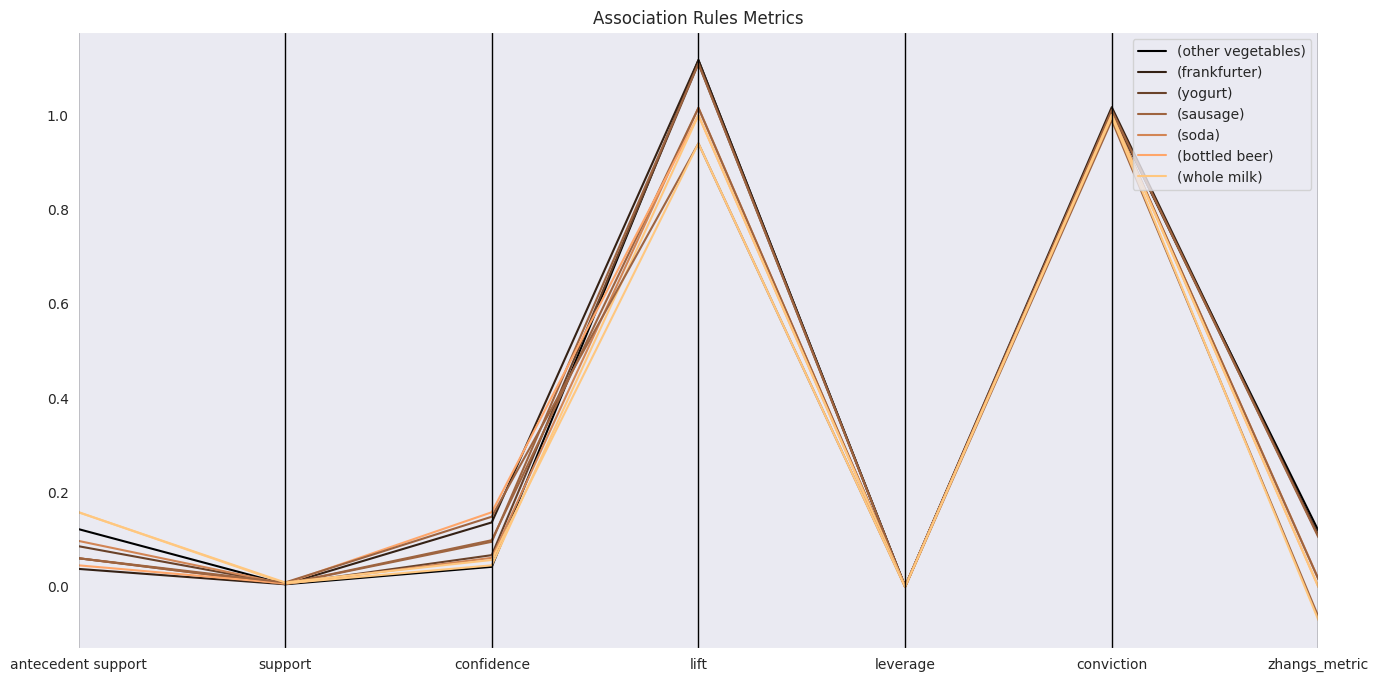

In [ ]:
# Visualizing association rules antecedents and filtering rules with zhangs_metric
rules_with_zhang = rules.dropna(subset=['zhangs_metric'])

# Sort rules based on Zhang's metric in descending order
sorted_rules = rules_with_zhang.sort_values(by='zhangs_metric', ascending=False).head(10)

# Select relevant columns for the parallel coordinates plot
columns_to_plot = ['antecedent support', 'support', 'confidence', 'lift', 'leverage', 'conviction','zhangs_metric', 'antecedents']

# Plot the parallel coordinates plot
plt.figure(figsize=(16, 8))
pd.plotting.parallel_coordinates(sorted_rules[columns_to_plot], 'antecedents', colormap="copper")

plt.title('Association Rules Metrics')
plt.show()

**EXPLANATION OF METRICS TERMS IN ASSOCIATION RULE**

**Note:** The antecedents and consequents are items in the association rule that are associated with each other.

**Antecedents:** These are the items that precede an item in the association.
Consequents: These are the items that comes after an item in the association.

**Antecedent Support:** This is the proportion of transactions in the dataset that contain the antecedent.

**Consequent Support:** This is the proportion of transactions in the dataset that contain the consequent.

These measures tells us how frequently the antecedent and consequent items occur independently in the dataset.

**Support:**
This is the proportion of transactions that contain both the antecedent and the consequent. It measures the joint occurrence of the antecedent and consequent in the dataset.

**Confidence:**
This is a measure of how often the rule has been found to be true. It's calculated as the support for both the antecedent and the consequent divided by the support for the antecedent.
It is a measure of the reliability or certainty of the rule.

**Lift:**
Lift measures how much more often the antecedent and consequent occur together than if they were statistically independent.
A lift value greater than 1 indicates that the antecedent and consequent are more likely to occur together, suggesting a positive association.

**Leverage:**
Leverage measures the difference between the observed frequency of the antecedent and consequent co-occurrence and the frequency that would be expected if they were independent.
A positive leverage indicates that the antecedent and consequent appear together more often than expected.

**Conviction:**
Conviction is a measure of how much greater the likelihood of the consequent is, given that the antecedent is true.
Higher conviction values indicate a stronger relationship between the antecedent and consequent. The lift and conviction metrics is used to measure the likely occurrence (association) of the antecedent and consequent together.

**Zhang's Metric:**
Zhang's metric combines both the lift and confidence measures.
Higher values of Zhang's metric suggest more interesting and reliable rules.A higher positive value indicates a more interesting and stronger association while a lower positive value or a negative value suggests a less interesting or weaker association.


**NOTE:**
A good association rule is one that has high support, confidence, and lift, indicating that it is both frequent and reliable.

So for the purpose of the analysis we will be taking zhang's metric(combination of lift and confidence metrics) and conviction into consideration to determine the association rule because the support is relatively small(less than 1).

**EXPLAINATION IN SIMPLE TERMS:**

**Antecedents and Consequents:**

Antecedents can be thought of  as the items that come first or are bought first, and consequents are the items that come next or are bought together.

**Antecedent Support and Consequent Support:**

Antecedent support tells us how often the first item is bought alone.
Consequent support tells us how often the second item is bought alone.

**Support:**

 It tells us how often two items are bought together. The higher the support, the stronger the friendship.

**Confidence (reliability):**

Confidence tells how likely you are to buy the second item as well,if you buy the first item.

**Lift (surprise):**
If lift is greater than 1, it means the items are more likely to be bought together than by chance. It's like saying, "Hey, these items are buddies!"

**Leverage:**

Leverage is a measure of extra togetherness. A positive value means the items are more often bought together than we'd expect. It's like finding a bonus in your shopping basket.

**Conviction:**

Conviction is a measure of how much you'd miss the second item if you didn't buy the first. A higher conviction means you'd miss it more. It's like saying, "I really need the second item if I have the first!"

**Zhang's Metric:**

Zhang's metric is like a combined score of surprise and reliability. A higher positive value means the items really go well together, and a lower or negative value means they might not be as good together.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1500x1000 with 0 Axes>

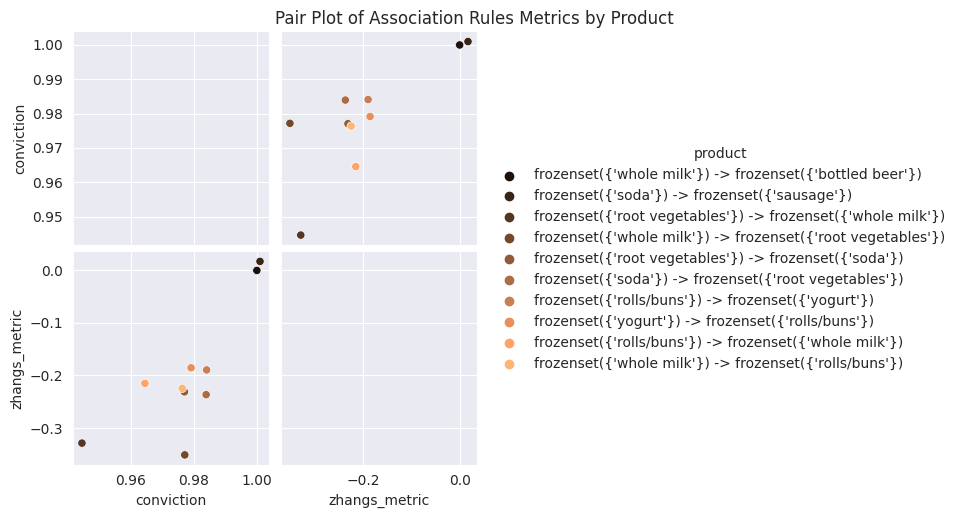

In [ ]:
# Filter rules with Zhang's metric
rules_with_zhang = rules.dropna(subset=['zhangs_metric'])

# Sort rules based on Zhang's metric in descending order
sorted_rules = rules_with_zhang.sort_values(by='antecedents', ascending=False).head(10)

# Select relevant columns for the pair plot
columns_to_plot = ['conviction','zhangs_metric']

# Add a column for the product (e.g., antecedents or consequents)
sorted_rules['product'] = sorted_rules['antecedents'].astype(str) + ' -> ' + sorted_rules['consequents'].astype(str)

# Create a pair plot
plt.figure(figsize=(15, 10))
sns.pairplot(sorted_rules, vars=columns_to_plot, hue='product', palette='copper')
plt.suptitle('Pair Plot of Association Rules Metrics by Product', y=1.02)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


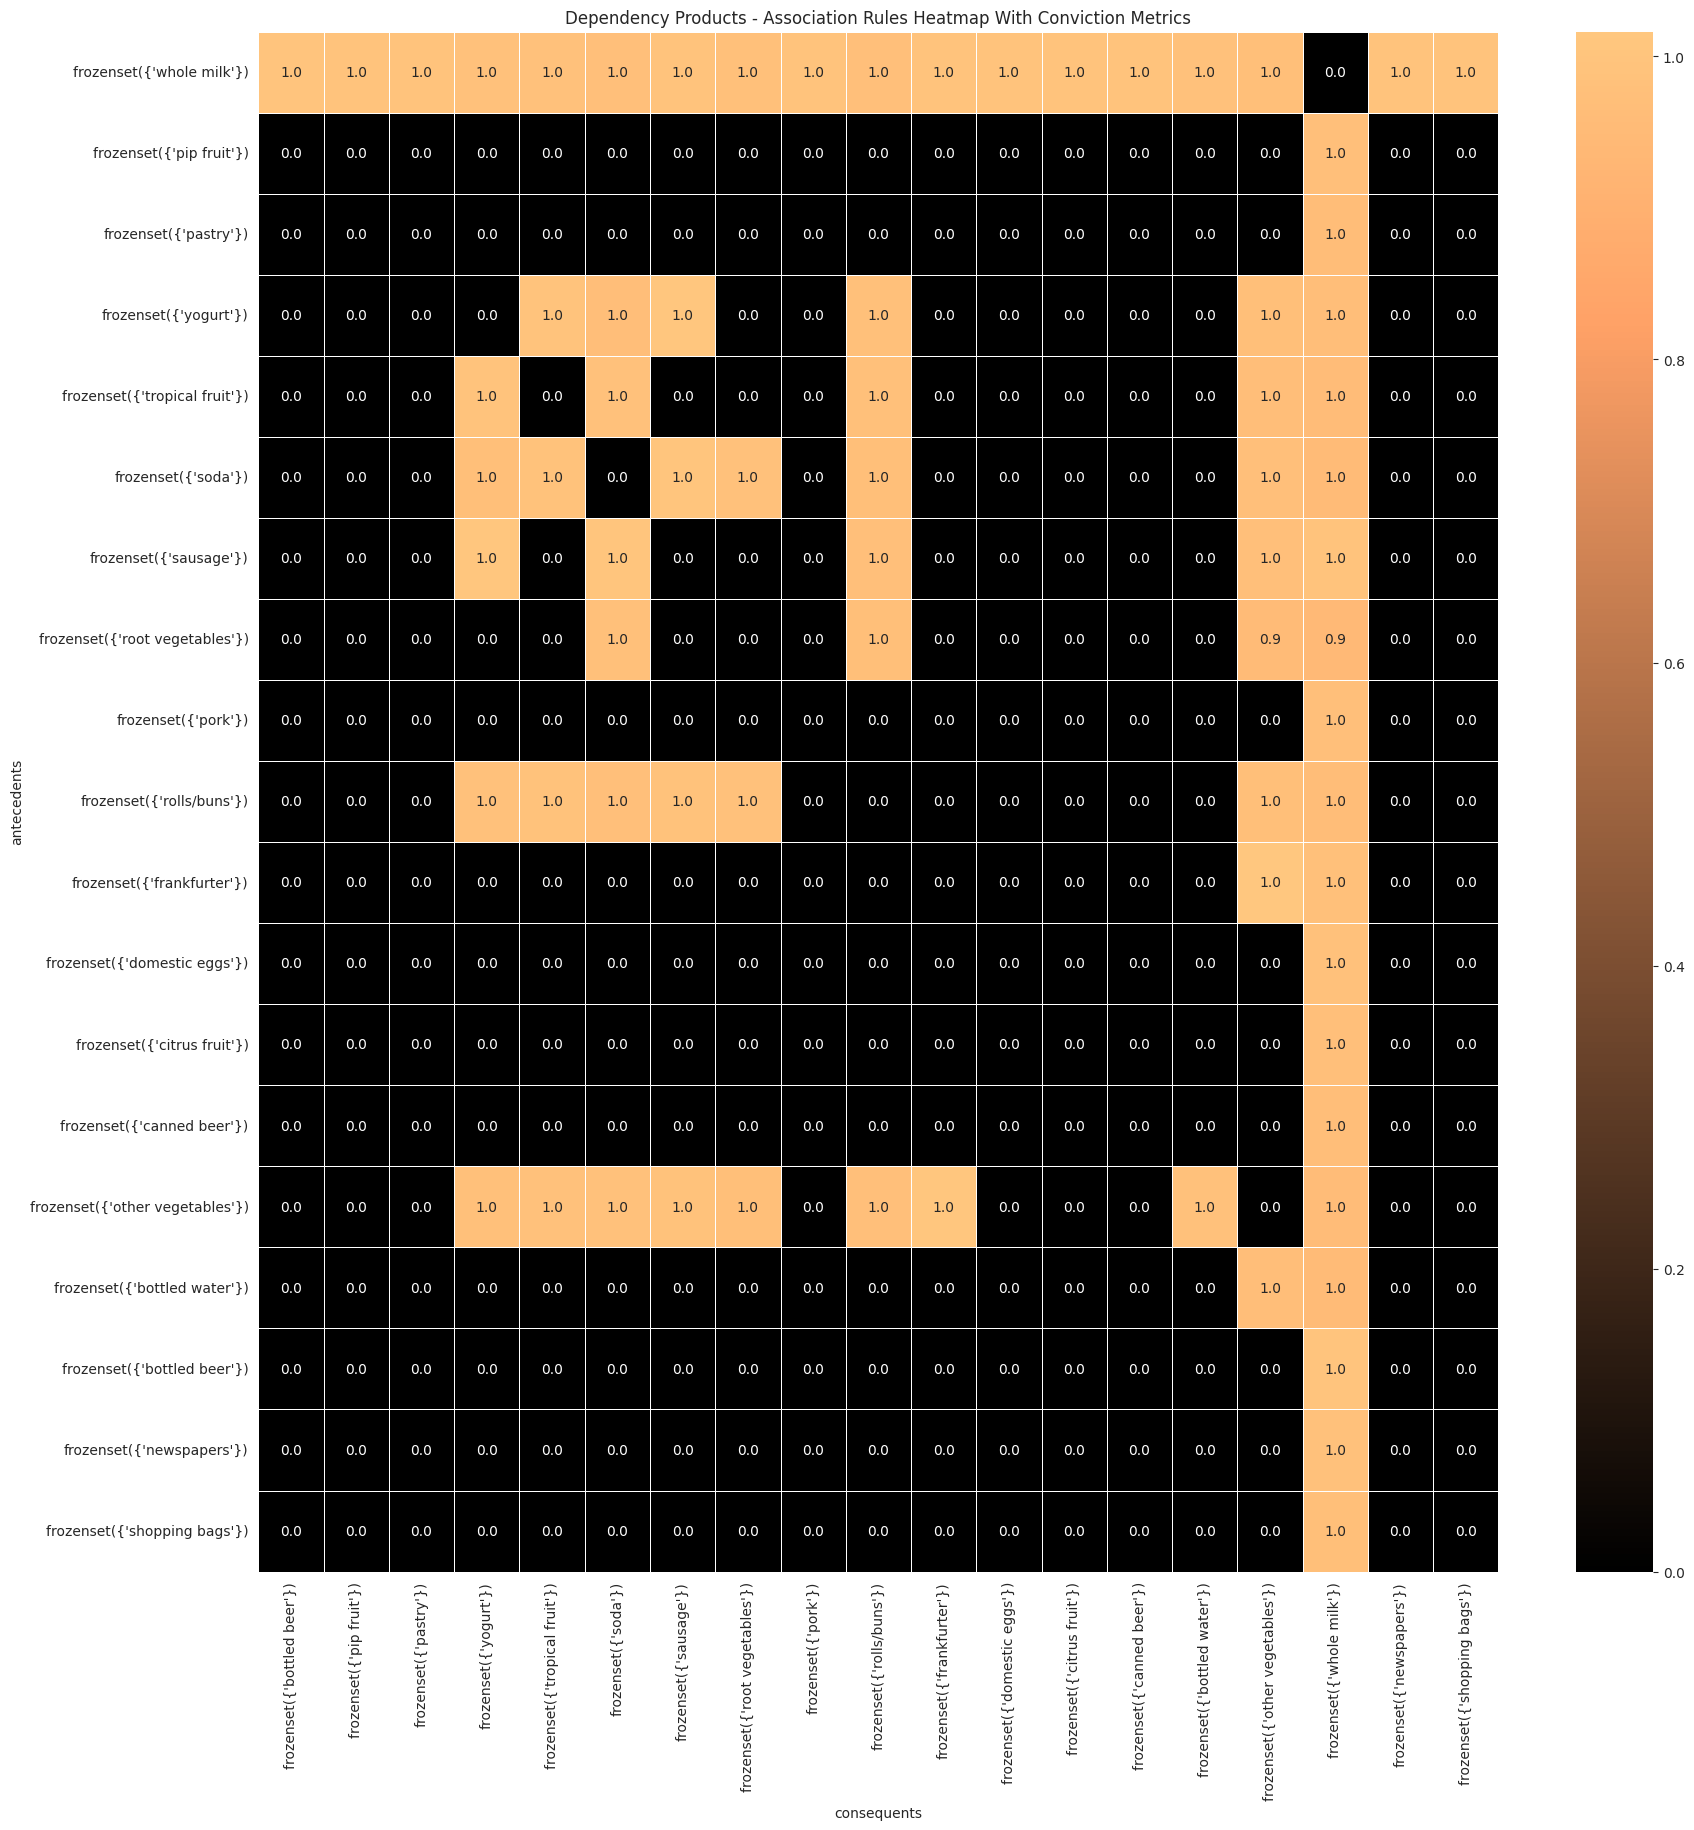

In [ ]:
# Creating a matrix of product associations using conviction metrics
product_ass_sup = rules.pivot(index='antecedents', columns='consequents', values='conviction').fillna(0)

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(product_ass_sup, annot=True, cmap="copper", fmt=".1f", linewidths=.5)
plt.title("Dependency Products - Association Rules Heatmap With Conviction Metrics")
plt.show()


In [ ]:
# pairing strong dependency indication of  zhangs metric in a separate dataframe

depen_con = rules[rules['conviction'] >= 1]

depen_con.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
13,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
54,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
55,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
58,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


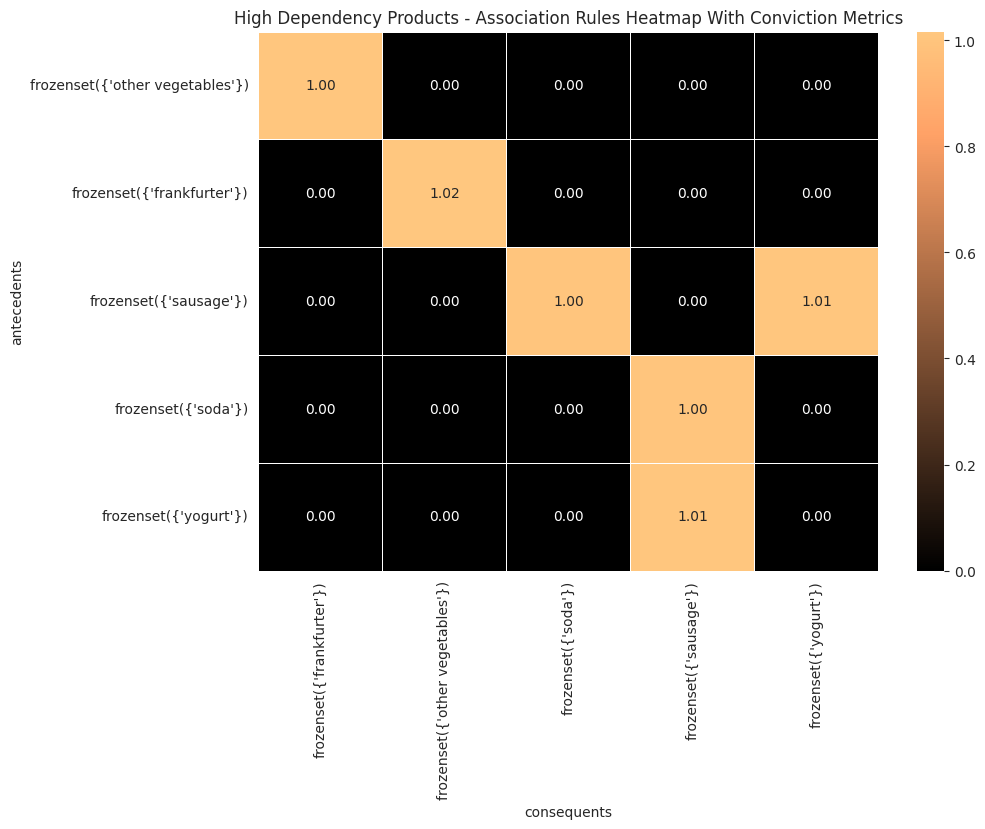

In [ ]:
 #Creating a matrix of product associations
depen_association = depen_con.pivot(index='antecedents', columns='consequents', values='conviction').fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(depen_association, annot=True, cmap="copper", fmt=".2f", linewidths=.5)
plt.title("High Dependency Products - Association Rules Heatmap With Conviction Metrics")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


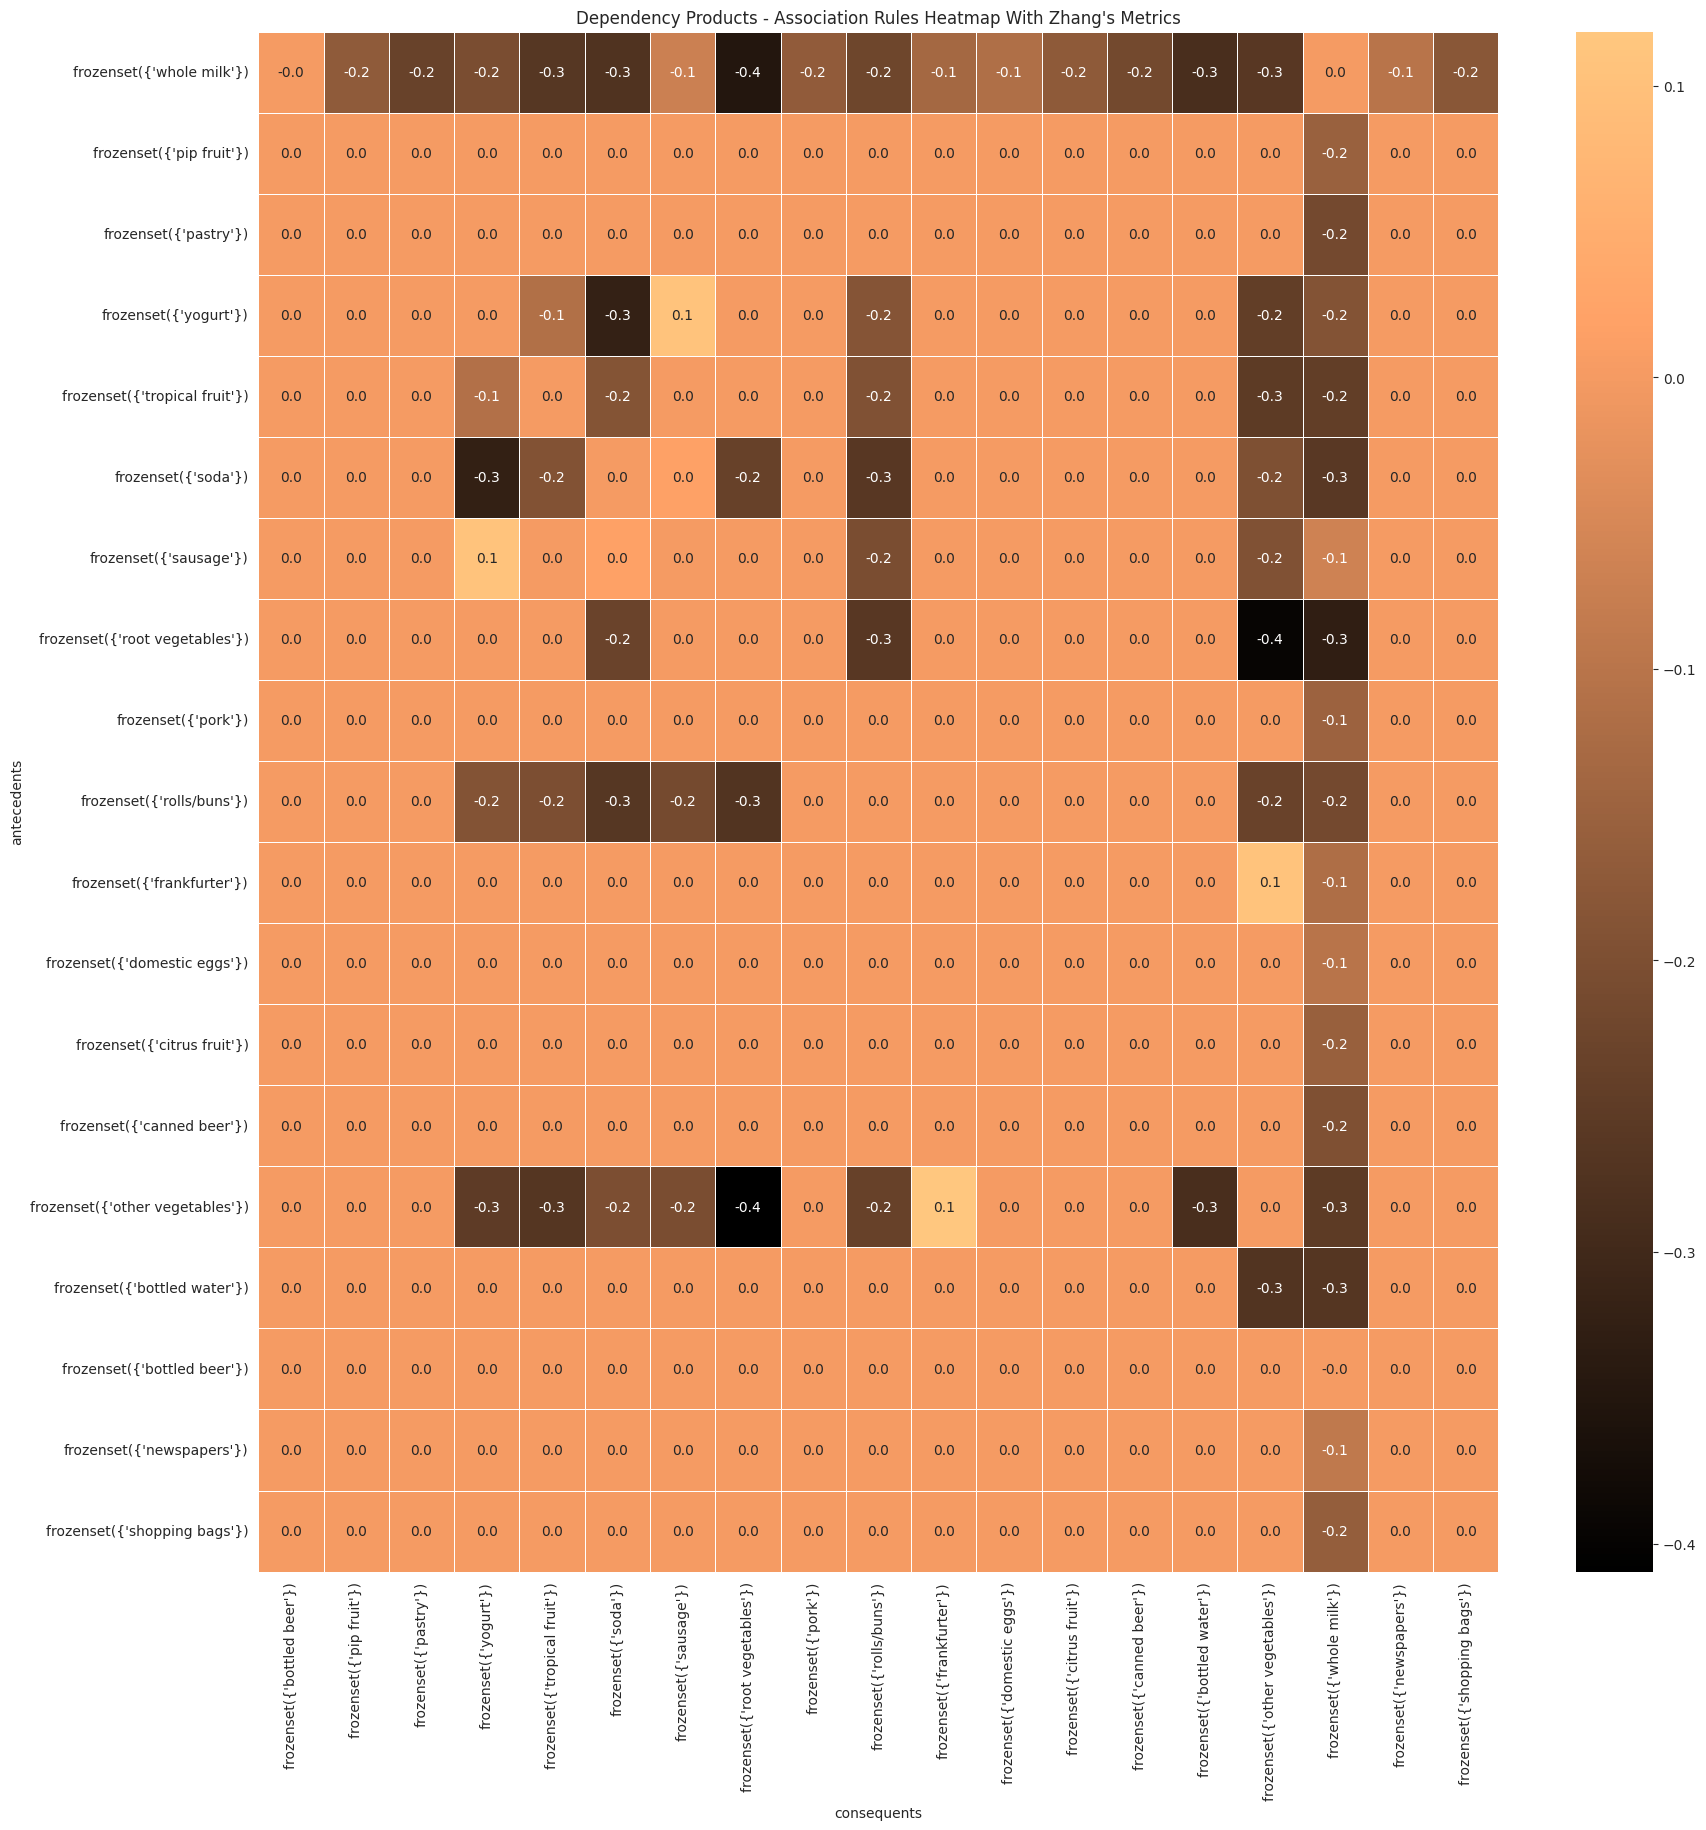

In [ ]:
# Creating a matrix of product associations using zhangs_metric
pro_ass_zhang = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(pro_ass_zhang, annot=True, cmap="copper", fmt=".1f", linewidths=.5)
plt.title("Dependency Products - Association Rules Heatmap With Zhang's Metrics")
plt.show()


In [ ]:
# pairing strong dependency indication of  zhangs metric in a separate dataframe

depen_zhangs = rules[rules['zhangs_metric'] > 0]

depen_zhangs.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
13,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
54,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
55,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
58,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


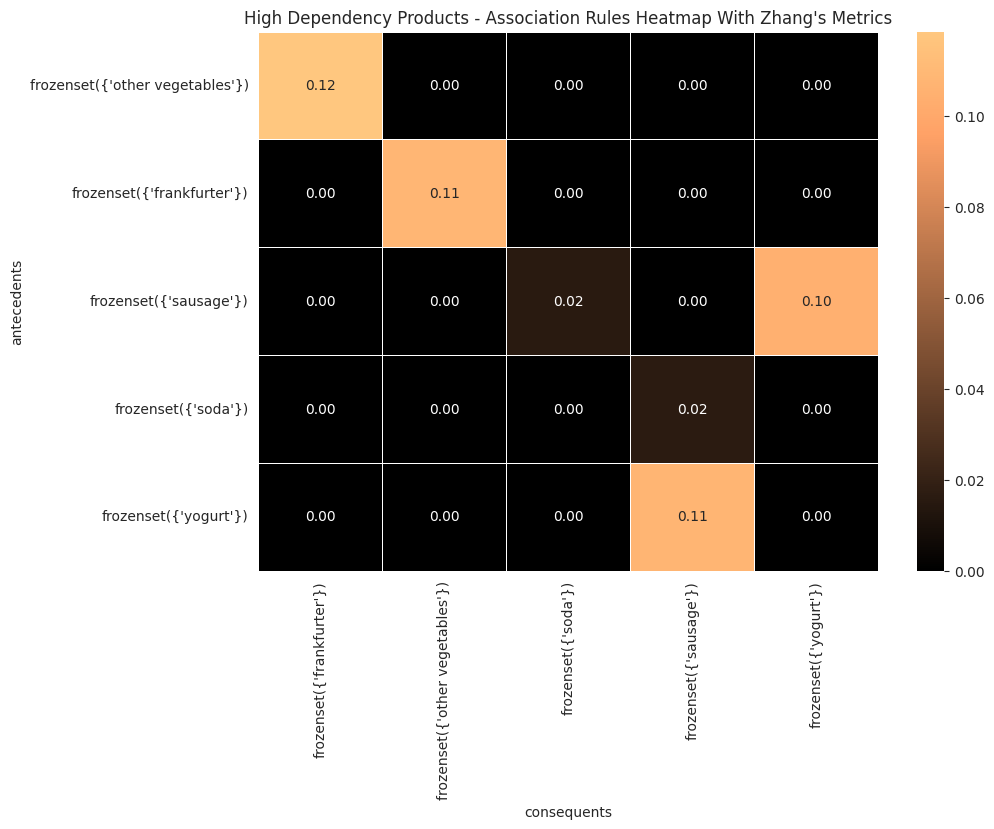

In [ ]:
 #Creating a matrix of product associations
depen_association = depen_zhangs.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(depen_association, annot=True, cmap="copper", fmt=".2f", linewidths=.5)
plt.title("High Dependency Products - Association Rules Heatmap With Zhang's Metrics")
plt.show()

**INTERPRETATION AND INSIGHTS**

**Observation:**

In general, when examining association rules, it is noticed that rules with a conviction value greater than or equal to 1 tend to have a positive Zhang's metric. This positive Zhang's metric, which combines both lift and confidence, signifies a strong association between the items involved in the rule and a high level of certainty in the rule's validity.

From the table above it can be observed that the higher the support metrics the Zhang's metric becomes negative which suggests that the observed association is less interesting or meaningful than what would be expected based on the independence of confidence and lift.

**Implication:**
A conviction value of greater than or equal to 1 indicates that the antecedent significantly influences the likelihood of the consequent, strengthening the association between the items.

When this high conviction is coupled with a positive Zhang's metric, it reinforces the idea that the rule is not only strong but also interesting and reliable, as it surpasses what might occur randomly.

**Specific Observations:**

**Rule 13:** Customers buying 'other vegetables' are also buying 'frankfurter.' The lift is slightly above 1, indicating a positive association.

**Rule 59:** 'Yogurt' and 'sausage' have a positive association, but the confidence is relatively low.

**Rule 1:** 'Bottled beer' and 'whole milk' have a slightly negative lift, indicating they are less likely to be bought together than expected.

**Rule 56:** 'Sausage' and 'whole milk' have a negative lift, suggesting they are less likely to be bought together than expected.

It seems that certain items like 'sausage' and 'whole milk' have negative associations with other items, which might be interesting to investigate further.




**RECOMMENDATION**

**Product Placement:**

'other vegetables' and 'frankfurter' should be considered to be placed  together as they show a positive association.

**Marketing Strategies:**

 Marketing efforts should be made For 'yogurt' and 'sausage,' to focus on encouraging customers to buy them together, perhaps through promotions or special offers (discounted sales).

**Basket Optimization:**

Rules with negative lift, like 'bottled beer' and 'whole milk' or 'sausage' and 'whole milk.' should be analysed and Considered whether their placements can be adjusted or if there are cross-promotional opportunities.

Further Investigation should be carried on rules with low confidence and explore factors that might impact these associations.